# Convolutional Neural Networks for Image Classification:

## [CIFAR Dataset](https://en.wikipedia.org/wiki/CIFAR-10)

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Frog!')

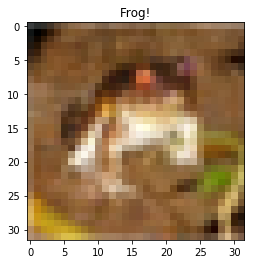

In [6]:
plt.imshow(x_train[0])
plt.title('Frog!')

Text(0.5,1,'Horse!')

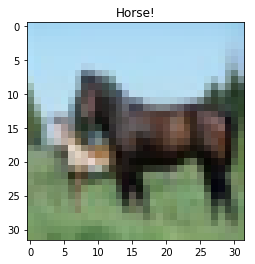

In [7]:
plt.imshow(x_train[12])
plt.title('Horse!')

# Preprocessing, normalization

In [8]:
x_train.max()

255

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train.max()

1.0

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Convert labels

In [13]:
from keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

# Build model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

# Conv Layer
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32,32,3), activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Conv Layer
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32,32,3), activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# Dense connected:
model.add(Dense(256, activation='relu'))

# Output CLASSIFIER
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

# Train the model

In [ ]:
%time
model.fit(x_train, y_cat_train, verbose=1, epochs=10)

Wall time: 0 ns
Epoch 1/10


In [ ]:
model.metrics_names

### Evaluate the model

In [ ]:
model.evaluate(x_test, y_cat_test)

# Predictions on new images

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test, predictions))

## Check lecture's notebook
('06-Deep-Learning-Computer-Vision/02-Keras-CNN-CIFAR-10.ipynb') for a larger model